<a href="https://colab.research.google.com/github/CGproject-record/survival_anaysis_try/blob/main/20230913_survival_analysis_in_random_forest_and_tree_gradient_boosting_and_extra_tree-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-survival

In [2]:
# Random forest

In [3]:
import matplotlib.pyplot as plt
from sksurv.datasets import load_whas500
from sksurv.ensemble import RandomSurvivalForest

In [4]:
X, y = load_whas500()
X = X.astype(float)

In [5]:
X

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp
0,1.0,83.0,0.0,25.54051,0.0,1.0,78.0,0.0,89.0,5.0,1.0,0.0,0.0,152.0
1,0.0,49.0,0.0,24.02398,0.0,1.0,60.0,0.0,84.0,5.0,0.0,1.0,0.0,120.0
2,0.0,70.0,0.0,22.14290,0.0,0.0,88.0,1.0,83.0,5.0,0.0,1.0,0.0,147.0
3,0.0,70.0,0.0,26.63187,1.0,1.0,76.0,0.0,65.0,10.0,0.0,1.0,0.0,123.0
4,0.0,70.0,0.0,24.41255,0.0,1.0,85.0,0.0,63.0,6.0,0.0,1.0,0.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,76.0,0.0,27.96454,0.0,1.0,88.0,1.0,68.0,1.0,0.0,1.0,0.0,112.0
496,0.0,76.0,0.0,24.26862,0.0,1.0,96.0,1.0,88.0,3.0,0.0,0.0,0.0,208.0
497,1.0,57.0,0.0,42.13576,0.0,1.0,74.0,1.0,123.0,3.0,0.0,0.0,0.0,120.0
498,0.0,67.0,0.0,27.40905,0.0,1.0,62.0,0.0,59.0,1.0,0.0,1.0,0.0,112.0


In [6]:
y

array([(False, 2.178e+03), (False, 2.172e+03), (False, 2.190e+03),
       ( True, 2.970e+02), (False, 2.131e+03), ( True, 1.000e+00),
       (False, 2.122e+03), ( True, 1.496e+03), ( True, 9.200e+02),
       (False, 2.175e+03), (False, 2.173e+03), ( True, 1.671e+03),
       (False, 2.192e+03), ( True, 8.650e+02), (False, 2.166e+03),
       (False, 2.168e+03), ( True, 9.050e+02), ( True, 2.353e+03),
       (False, 2.146e+03), ( True, 6.100e+01), ( True, 2.358e+03),
       (False, 2.114e+03), (False, 2.132e+03), (False, 2.139e+03),
       (False, 2.048e+03), (False, 2.152e+03), ( True, 6.000e+00),
       (False, 2.156e+03), ( True, 1.180e+02), (False, 2.064e+03),
       ( True, 8.490e+02), ( True, 7.140e+02), (False, 2.057e+03),
       ( True, 2.000e+00), ( True, 7.000e+00), (False, 2.151e+03),
       ( True, 6.000e+00), ( True, 4.220e+02), ( True, 3.540e+02),
       (False, 2.065e+03), (False, 2.048e+03), ( True, 1.065e+03),
       ( True, 5.350e+02), (False, 2.118e+03), ( True, 9.700e+

In [7]:
estimator = RandomSurvivalForest().fit(X, y)

In [8]:
chf_funcs = estimator.predict_cumulative_hazard_function(X.iloc[:5])

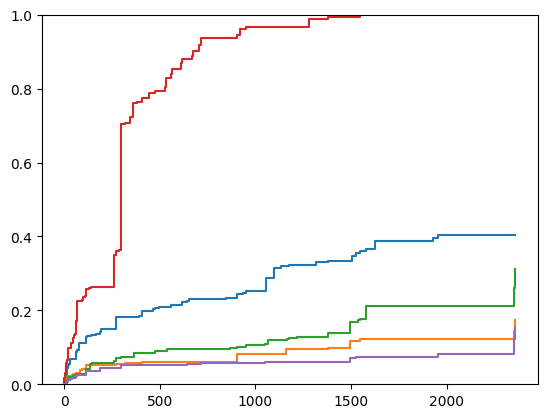

In [9]:
for fn in chf_funcs:
   plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()

In [10]:
# tree

In [11]:
# Tree
from sksurv.tree import SurvivalTree

In [12]:
estimator = SurvivalTree().fit(X, y)

In [13]:
chf_funcs = estimator.predict_cumulative_hazard_function(X.iloc[:5])

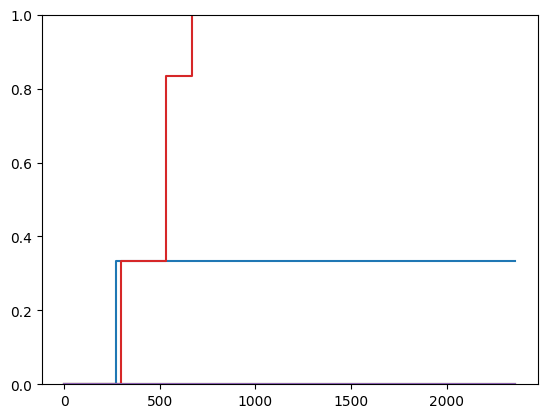

In [14]:
for fn in chf_funcs:
   plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()

In [15]:
# extra teee
from sksurv.ensemble import ExtraSurvivalTrees

In [16]:
estimator = ExtraSurvivalTrees().fit(X, y)

In [17]:
surv_funcs = estimator.predict_cumulative_hazard_function(X.iloc[:5])

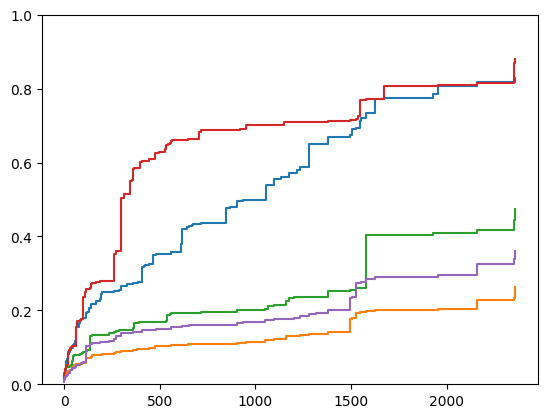

In [18]:
for fn in surv_funcs:
   plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()

In [19]:
# GradientBoosting
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

In [20]:
estimator = GradientBoostingSurvivalAnalysis(loss="coxph").fit(X, y)

In [21]:
chf_funcs = estimator.predict_cumulative_hazard_function(X.iloc[:5])

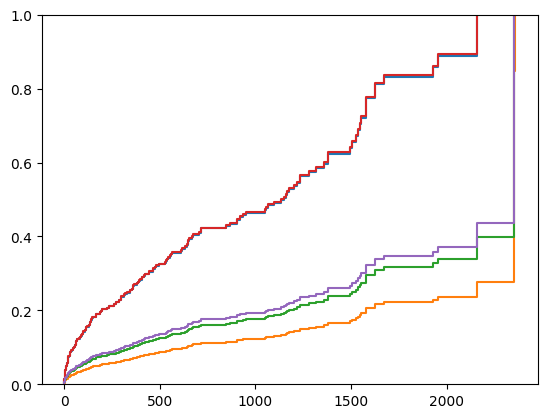

In [22]:
for fn in chf_funcs:
    plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()